In [1]:
import os
os.getcwd()

'/Users/pjk/Wunderkammer/AntheiaWorkshop/notebooks'

In [45]:
import pandas as pd
from random import random
from random import randint
from random import seed
import numpy as np
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
import xgboost as xgb
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.svm import SVR
from sklearn import model_selection

from matplotlib import pyplot
import matplotlib.pyplot as plt
from plotnine import *

In [3]:
df = pd.read_csv('../data/FermentationBiomassProduction.csv')

In [4]:
df = df.dropna()

In [5]:
df = df.drop(['Unnamed: 0', 'Reference year'], axis=1)

In [6]:
df.sample(5)

,Inoculum size (cell/ml),COD (g/L),Oil and grease (g/L),TKN,Olive oil (%),Glucose (g/L),Crude glycerol (%),Tween 20 (%),Tween 80 (%),Peptone (g/L),...,Magnesium chloride (g/l),Iron(III) chloride (g/l),Potassium Di-hydrogen phosphate (g/l),Calcium chloride (g/l),Sodium chloride (g/l),Temp (C),Shakin g rate (rpm),pH,Time (h),Biomass (g/l)
181,100000000.0,101.000,4.95,0.0,0,0,1.860,0,0,0,...,0.0,0.0,0.0,0.0,0,30,140,6.0,69,6.18
130,100000000.0,112.594,0.00,0.0,0,0,4.000,0,0,0,...,0.0,0.0,0.0,0.0,0,30,140,6.0,36,2.64
246,100000000.0,10.100,0.33,0.0,0,0,0.124,0,0,0,...,0.0,0.0,0.0,0.0,0,30,140,6.0,0,0.73
56,100000000.0,0.000,0.00,0.0,0,40,0.000,0,0,5,...,0.0,0.0,0.0,0.0,0,30,140,6.0,72,8.65
77,100000000.0,37.210,0.00,0.0,0,0,0.000,0,0,0,...,0.0,0.0,0.0,0.0,0,30,140,6.0,72,5.15


In [8]:
# split into input and output elements
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(277, 25) (277,)


Alternatively ...

In [12]:
XX = df.drop(['Biomass (g/l)'], axis=1)
yy = df['Biomass (g/l)']
print(XX.shape, yy.shape)

(277, 25) (277,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)

In [14]:
X_train.head()

,Inoculum size (cell/ml),COD (g/L),Oil and grease (g/L),TKN,Olive oil (%),Glucose (g/L),Crude glycerol (%),Tween 20 (%),Tween 80 (%),Peptone (g/L),...,Di- potassium hydrogen phosphat e (g/l),Magnesium chloride (g/l),Iron(III) chloride (g/l),Potassium Di-hydrogen phosphate (g/l),Calcium chloride (g/l),Sodium chloride (g/l),Temp (C),Shakin g rate (rpm),pH,Time (h)
292,250000000.0,0.000,0.000,0.0000,0,0,4.60,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,28,180,6.5,0
131,100000000.0,112.594,0.000,0.0000,0,0,4.00,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,30,140,6.0,48
33,100000000.0,42.500,0.241,0.1825,0,0,0.00,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,30,140,5.0,60
88,100000000.0,37.210,0.000,0.0000,0,0,0.00,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,30,140,6.0,36
296,250000000.0,0.000,0.000,0.0000,0,0,3.95,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,28,180,6.5,48


In [15]:
y_train.head()

292    0.90
131    3.27
33     6.36
88     2.73
296    8.71
Name: Biomass (g/l), dtype: float64

## Linear Regression

In [16]:
model = c

# Scaling is optional but recommended in most cases for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Training the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

In [19]:
print("Linear Regression:")
print("  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("  R²:", r2_score(y_test, y_pred_lr))

Linear Regression:
  RMSE: 1.375499799532297
  R²: 0.7913715826255447


In [20]:
slope, intercept = np.polyfit(y_pred_lr, y_test, 1)
print(slope, intercept)

1.0260825099674025 0.04723478679477025


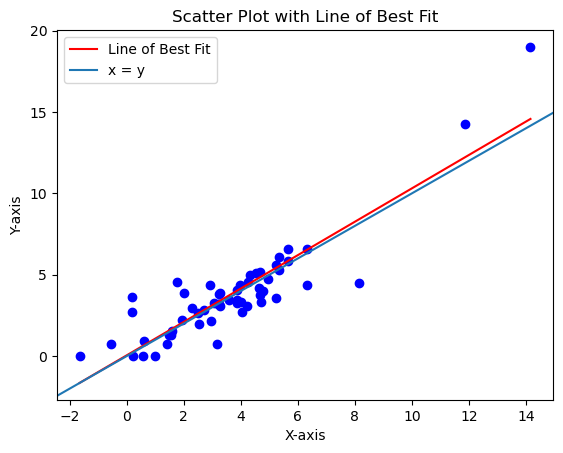

In [24]:
# Create scatter plot
plt.scatter(y_pred_lr, y_test, color='blue')

x_fit = np.linspace(y_pred_lr.min(), y_pred_lr.max(), 100)
y_fit = slope * x_fit + intercept
plt.plot(x_fit, y_fit, color='red', label = 'Line of Best Fit')

plt.axline([0, 0], [1, 1], label = 'x = y')

# Show plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Line of Best Fit')
plt.legend()
plt.show()

In [25]:
weights = lr_model.coef_
intercept = lr_model.intercept_

print("\nLinear Regression Model Weights (Coefficients):")
for feature, weight in zip(X.columns, weights):
  print(f"  {feature}: {weight}")

print("\nLinear Regression Model Intercept:")
print(f"  {intercept}")


Linear Regression Model Weights (Coefficients):
  Inoculum size (cell/ml): 0.38640263367236277
  COD (g/L): 3.009603172169038
  Oil and grease (g/L): 1.8999430708604672
  TKN: -0.5407429020312943
  Olive oil (%): 0.6817146312052075
  Glucose (g/L): 0.3811549579732571
  Crude glycerol (%): -2.8104183561981615
  Tween 20 (%): 0.06197353759257063
  Tween 80 (%): 0.061973537592566866
  Peptone (g/L): 0.38115495797326077
  Ammonium sulfate (g/L): -0.09831297505129252
  Yeast extract (g/L): -0.1456087445311399
  Urea (g /L): -0.04983579688333617
  Total nitrogen (g/L): -2.6113344392019826
  Mono- sodium glutam ate (g/l): 0.07717606721511248
  Di- potassium hydrogen phosphat e (g/l): 0.0771760672151036
  Magnesium chloride (g/l): 0.07717606721510549
  Iron(III) chloride (g/l): 0.07717606721510421
  Potassium Di-hydrogen phosphate (g/l): 0.07717606721510338
  Calcium chloride (g/l): 0.07717606721510338
  Sodium chloride (g/l): 0.07717606721510421
  Temp (C): -1.1073111473749777
  Shakin g rat

## XGBoost Regression

In [27]:
xgb_model = xgb.XGBRegressor(n_estimators = 100, max_depth = 4, random_state = 42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [28]:
print("\nXGBoost:")
print("  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("  R²:", r2_score(y_test, y_pred_xgb))


XGBoost:
  RMSE: 0.9999986187840261
  R²: 0.8897315674960339


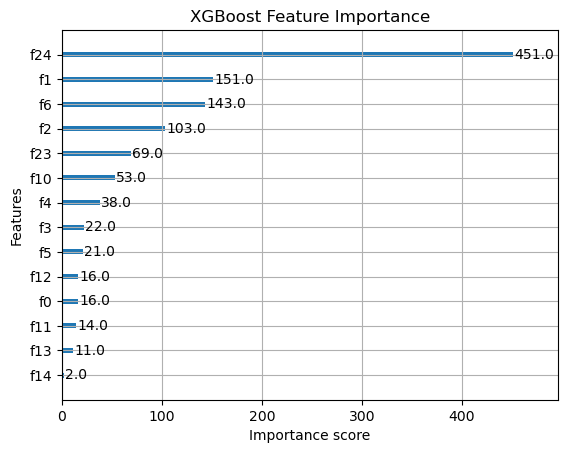

In [29]:
xgb.plot_importance(xgb_model)
plt.title("XGBoost Feature Importance")
plt.show()

In [30]:
X_train.columns[24]

'Time (h)'

In [31]:
X_train.columns[1]

'COD (g/L)'

In [32]:
X_train.columns[6]

'Crude glycerol (%)'

In [33]:
X_train.columns[2]

'Oil and grease (g/L)'

In [34]:
y_pred_xgb = xgb_model.predict(X_test_scaled)

1.1048380949382506
-0.20084399411145798


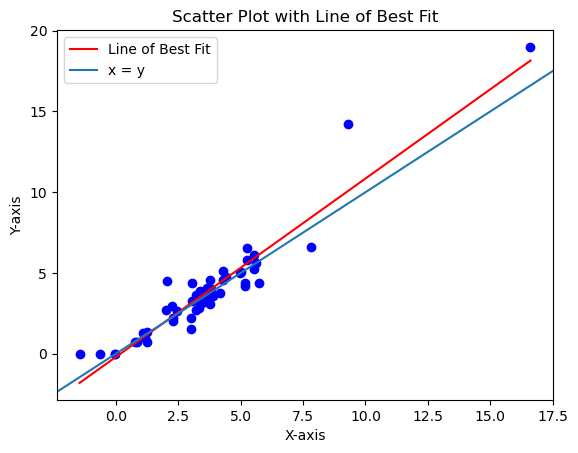

In [35]:
# Create scatter plot

slope, intercept = np.polyfit(y_pred_xgb, y_test, 1)
print(slope)
print(intercept)

plt.scatter(y_pred_xgb, y_test, color='blue')

x_fit = np.linspace(y_pred_xgb.min(), y_pred_xgb.max(), 100)
y_fit = slope * x_fit + intercept
plt.plot(x_fit, y_fit, color='red', label='Line of Best Fit')

plt.axline([0, 0], [1, 1], label = 'x = y')

# Show plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Line of Best Fit')
plt.legend()
plt.show()

## Support Vector Machine (SVM) Regression

In [37]:
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

In [38]:
print("\nSVR:")
print("  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print("  R²:", r2_score(y_test, y_pred_svr))


SVR:
  RMSE: 1.943040030846813
  R²: 0.5836909069132838


1.4249476152149991
-1.331339043473944


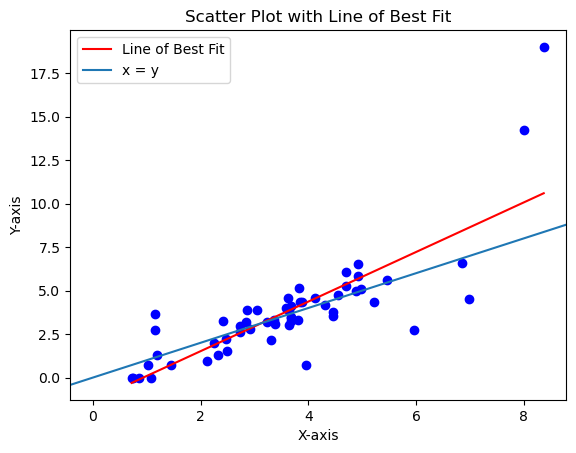

In [39]:
# Create scatter plot

slope, intercept = np.polyfit(y_pred_svr, y_test, 1)
print(slope)
print(intercept)

plt.scatter(y_pred_svr, y_test, color='blue')

x_fit = np.linspace(y_pred_svr.min(), y_pred_svr.max(), 100)
y_fit = slope * x_fit + intercept
plt.plot(x_fit, y_fit, color='red', label='Line of Best Fit')

plt.axline([0, 0], [1, 1], label = 'x = y')

# Show plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Line of Best Fit')
plt.legend()
plt.show()

 ## Compare Algorithms

In [40]:
seed = 42

In [42]:
models = []
models.append(('LR', LinearRegression()))
models.append(('XGB', xgb.XGBRegressor(n_estimators = 100, max_depth = 4, random_state = 42)))
models.append(('SVR', SVR()))

In [43]:
models

[('LR', LinearRegression()),
 ('XGB',
  XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=100,
               n_jobs=None, num_parallel_tree=None, ...)),
 ('SVR', SVR())]

In [48]:
# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
	kfold = model_selection.KFold(n_splits = 10)
	cv_results = model_selection.cross_val_score(model, X, y, cv = kfold, scoring = scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: -1.384860 (1.234562)
XGB: -0.857516 (0.969369)
SVR: -1.776530 (1.337186)


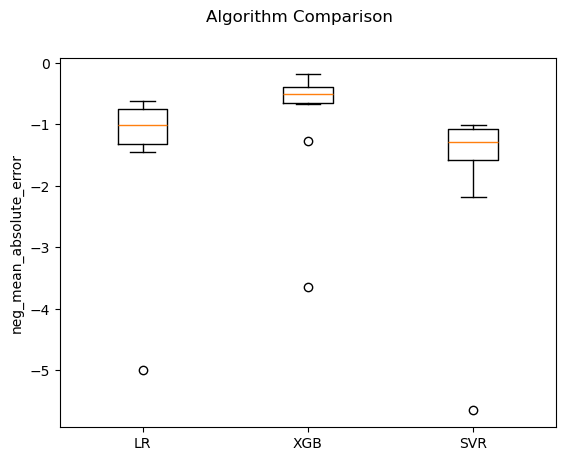

In [50]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel('neg_mean_absolute_error')
ax.set_xticklabels(names)
plt.show()